## TALLER TEORÍA CUÁNTICA BÁSICA, OBSERVABLES Y MEDIDAS
#### Sebastian Guerrero Ruge

## Excercises

# 1. SIMULE EL PRIMER SISTEMA CUÁNTICO DESCRITO EN LA SECCIÓN 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

In [6]:
import numpy as np

def norma(v, p):
    a = v[p]
    num = np.linalg.norm(a)
    return num ** 2

def sum_prov(v, p):
    suma = 0
    for p in range(len(v)):
        sum1 = suma + norma(v, p)
        suma = sum1
    return suma

def prov(v, p):
    num = norma(v, p)
    den = sum_prov(v, p)
    return num / den

### 1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [7]:
v1=np.array([-3-1j,-2j,-1j,2])
p=2
one=prov(v1,p)
print(one)

0.05263157894736842


### 2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [8]:
import numpy as np
def probabilidad(v1, v2):
    v1n = v1 / np.linalg.norm(v1)**(1/2)
    v2n = v2 / np.linalg.norm(v2)**(1/2)
    r = np.transpose(np.conjugate(v2n))
    o = np.dot(r, v1n)
    p = np.real(o)
    i = np.imag(o)
    tra2 = norma(np.array([p, i]), 0)
    return tra2

In [9]:
v1 = np.array([3+5j, 6+3j, 1+0j])
v2 = np.array([2+1j, -3j, 4])
prt = probabilidad(v1, v2)
print(prt)

0.7348469228349533


## COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4.

### 1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [10]:
import numpy as np
def amplitud(v1, v2):
    v1n = v1 / np.linalg.norm(v1)**(1/2)
    v2n = v2 / np.linalg.norm(v2)**(1/2)
    r = np.transpose(np.conjugate(v2n))
    o = np.dot(r, v1n)
    return o
def probabilidadtrans(v1,v2):
    x=np.array(v1)
    vn=x/np.linalg.norm(x)
    y=np.array(v2)
    vn2=y/np.linalg.norm(y)
    r=np.transpose(np.conjugate(vn2))
    o=np.dot(r,vn)
    p=np.real(o)
    i=np.imag(o)
    normanum=(p**2)+(i**2)
    return normanum

In [11]:
v1=np.sqrt(2)/2* np.transpose(np.array([1,1j]))
v2=np.sqrt(2)/2* np.transpose(np.array([1j,-1]))
rt=amplitud(v1,v2)
print(rt)
prt=probabilidadtrans(v1,v2)
print(prt)


-1.0000000000000002j
1.0000000000000004


### 2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [12]:
def hervarmed(m,a):
    ma=len(m)
    na=(len(m[0]))
    c=[[0 for i in range (len(m))]for j in range (len(m))]
    for elemento in c:
        for i in range (ma):
            for j in range(na):
                c[i][j]=np.conjugate(m[j][i])
    if m==c:
        media = np.real(np.dot(np.conjugate(np.transpose(a)), np.dot(m, a)))
        varianza = np.real(np.dot(np.conjugate(np.transpose(a)), np.dot(np.dot(m,m), a)) - media**2)
        return media, varianza
    else:
        return("Matriz no hermitiana")

In [13]:
v=hervarmed([[2, 1+3j],[1-3j, 4]], [1,0])
if v != "Matriz no hermitiana" :
    print ("La media y la varianza para la materiz da:")
    print(v)
else :
    print (v)

v1=hervarmed([[9, 0+8j],[1-3j, 4]], [0,1])
if v1 != "Matriz no hermitiana" :
    print ("La media y la varianza para la materiz da:")
    print(v)
else :
    print(v1)

La media y la varianza para la materiz da:
(np.float64(2.0), np.float64(10.0))
Matriz no hermitiana


### 3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [14]:
import numpy as np
def val_prob(observable, vector_ket):
    if not es_hermitiana(observable):
        return "La matriz no es hermitiana"
    valores_propios, vectores_propios = np.linalg.eig(observable)
    probabilidades_transicion = []
    for vector_propio in vectores_propios.T:
        prob_transicion = np.abs(np.vdot(vector_ket, vector_propio)) ** 2
        probabilidades_transicion.append(prob_transicion)

    return valores_propios, probabilidades_transicion

def es_hermitiana(matriz):
    return np.allclose(matriz, matriz.T.conj())




In [15]:
observable = np.array([[1j, 0, 0], [0, 2+1j, 0], [0, 0, 3]])
vector_ket = np.array([1/np.sqrt(2) + 0j, 0, 1/np.sqrt(2) + 0j])

valores_propios = val_prob(observable, vector_ket)
print("Valores propios del observable:", valores_propios)


Valores propios del observable: La matriz no es hermitiana


## Ejercio 4.4.1

In [16]:
import numpy as np


U1 = np.array([[0, 1], [1, 0]])
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])

identity = np.identity(U1.shape[0])
unitary_check_U1 = np.allclose(np.dot(U1, U1.conj().T), identity)

P = np.dot(U1, U2)

unitary_check_P = np.allclose(np.dot(P, P.conj().T), identity)

print("¿U1 es unitaria?", unitary_check_U1)
print("¿El producto de U1 y U2 es unitario?", unitary_check_P)

¿U1 es unitaria? True
¿El producto de U1 y U2 es unitario? True


## Ejercicio 4.4.2

In [17]:
import numpy as np

A = np.array([[0, np.sqrt(1/2), np.sqrt(1/2), 0],
              [np.sqrt(1/2), 0, 0, np.sqrt(1/2)],
              [np.sqrt(1/2), 0, 0, -np.sqrt(1/2)],
              [0, np.sqrt(1/2), -np.sqrt(1/2), 0]])

state = np.array([1, 0, 0, 0])
state_after_one_step = np.dot(A, state)
state_after_two_steps = np.dot(A, state_after_one_step)
state_after_three_steps = np.dot(A, state_after_two_steps)
probability_at_position_3 = np.abs(state_after_three_steps[2])**2
print("Estado después de tres pasos de tiempo:", state_after_three_steps)
print("Probabilidad de encontrar la pelota cuántica en la posición 3:", probability_at_position_3)

Estado después de tres pasos de tiempo: [0.         0.70710678 0.70710678 0.        ]
Probabilidad de encontrar la pelota cuántica en la posición 3: 0.5000000000000002


## Ejercicio 4.3.1

In [18]:
import numpy as np
Sx = 0.5 * np.array([[0, 1], [1, 0]])
Sy = 0.5 * np.array([[0, -1j], [1j, 0]])
Sz = 0.5 * np.array([[1, 0], [0, -1]])
initial_state = np.array([1, 0])
resultant_state = np.dot(Sx, initial_state)
resultant_state_in_Sz_basis = np.dot(np.conj(np.transpose(Sz)), resultant_state)
probability_spin_up = np.abs(resultant_state_in_Sz_basis[0])**2
print("Estado resultante después de aplicar Sx:", resultant_state)
print("Probabilidad de que el estado resultante sea 'spin up':", probability_spin_up)

Estado resultante después de aplicar Sx: [0.  0.5]
Probabilidad de que el estado resultante sea 'spin up': 0.0


## Ejercicio 4.3.1

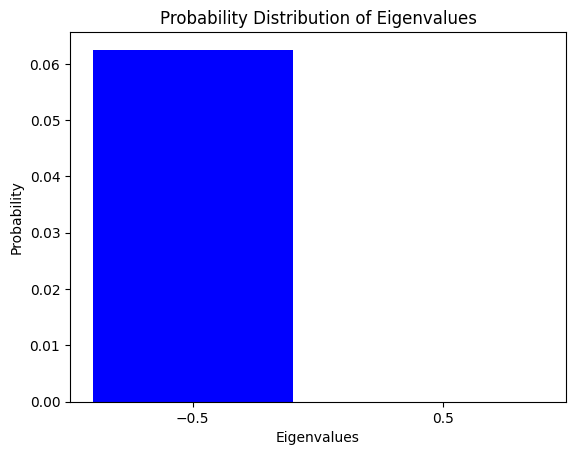

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Sx = 0.5 * np.array([[0, 1], [1, 0]])
Sy = 0.5 * np.array([[0, -1j], [1j, 0]])
Sz = 0.5 * np.array([[1, 0], [0, -1]])
initial_state = np.array([1, 0])
resultant_state = np.dot(Sx, initial_state)
resultant_state_in_Sz_basis = np.dot(np.conj(np.transpose(Sz)), resultant_state)
probability_spin_up = np.abs(resultant_state_in_Sz_basis[0])**2
probability_spin_down = np.abs(resultant_state_in_Sz_basis[1])**2

# Dibujar la distribución de probabilidad de los autovalores
eigenvalues = [-0.5, 0.5]  # Los autovalores de Sz son -1/2 y 1/2
probabilities = [probability_spin_down, probability_spin_up]
plt.bar(eigenvalues, probabilities, color=['blue', 'red'])
plt.xlabel('Eigenvalues')
plt.ylabel('Probability')
plt.title('Probability Distribution of Eigenvalues')
plt.xticks(eigenvalues)
plt.show()